In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy import stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score, precision_score, recall_score)
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.svm import LinearSVC

In [ ]:
df = pd.read_csv('/content/synthetic_stroke_data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,80.3,0,0,Yes,Govt_job,Urban,170.38,18.4,Unknown,0
1,2,Female,89.4,0,0,Yes,Self-employed,Urban,186.89,19.6,formerly smoked,0
2,3,Male,87.5,0,0,Yes,Children,Urban,118.42,34.7,never smoked,0
3,4,Male,19.7,0,0,Yes,Private,Urban,226.01,27.1,smokes,0
4,5,Male,85.2,0,0,Yes,Children,Rural,229.64,27.6,Unknown,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50000 non-null  int64  
 1   gender             50000 non-null  object 
 2   age                50000 non-null  float64
 3   hypertension       50000 non-null  int64  
 4   heart_disease      50000 non-null  int64  
 5   ever_married       50000 non-null  object 
 6   work_type          50000 non-null  object 
 7   Residence_type     50000 non-null  object 
 8   avg_glucose_level  50000 non-null  float64
 9   bmi                47500 non-null  float64
 10  smoking_status     50000 non-null  object 
 11  stroke             50000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.6+ MB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47500.000000,50000.000000
mean,25000.500000,54.021022,0.151220,0.102660,159.964413,27.540118,0.048540
std,14433.901067,20.809341,0.358267,0.303517,51.890421,7.216627,0.214906
min,1.000000,18.000000,0.000000,0.000000,70.010000,15.000000,0.000000
25%,12500.750000,36.100000,0.000000,0.000000,114.715000,21.300000,0.000000
50%,25000.500000,54.000000,0.000000,0.000000,160.100000,27.600000,0.000000
75%,37500.250000,72.100000,0.000000,0.000000,205.035000,33.800000,0.000000
max,50000.000000,90.000000,1.000000,1.000000,250.000000,40.000000,1.000000


##Preprossing

drop& Missing Values Treatment



In [ ]:
df = df.drop(columns=['id'])

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,2500
smoking_status,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
target_col = 'bmi'
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']

df_complete = df[df[target_col].notna()]
df_missing = df[df[target_col].isna()]

if not df_missing.empty:
    print(f"Starting imputation for {len(df_missing)} missing values in BMI...")


    X_train = df_complete[features]
    y_train = df_complete[target_col]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    X_test = df_missing[features]
    predicted_bmi = model.predict(X_test)

    df.loc[df[target_col].isna(), target_col] = predicted_bmi
    print("Imputation completed successfully!")
else:
    print("No missing values found in BMI column.")

Starting imputation for 2500 missing values in BMI...
Imputation completed successfully!


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


###**EDA** (Exploratory Data Analysis)

In [ ]:
custom_colors = ["#ADD8E6", "#FFC0CB"]
sns.set_palette(custom_colors)

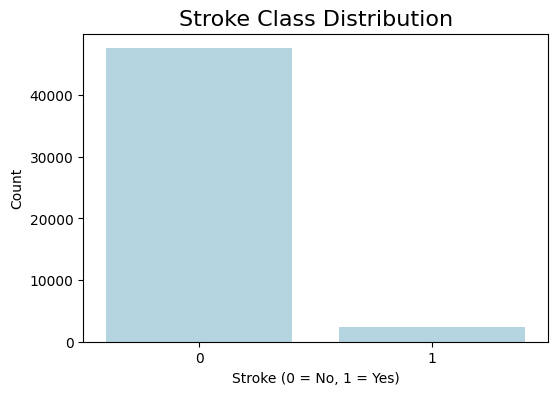

In [ ]:
# TARGET DISTRIBUTION
plt.figure(figsize=(6,4))
sns.countplot(x=df["stroke"])
plt.title("Stroke Class Distribution", fontsize=16)
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

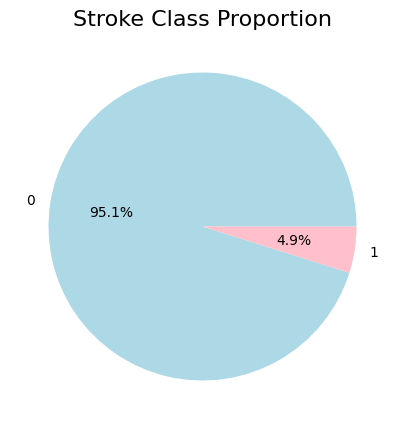

In [ ]:
plt.figure(figsize=(5,5))
df["stroke"].value_counts().plot.pie(autopct="%1.1f%%", colors=custom_colors)
plt.title("Stroke Class Proportion", fontsize=16)
plt.ylabel("")
plt.show()

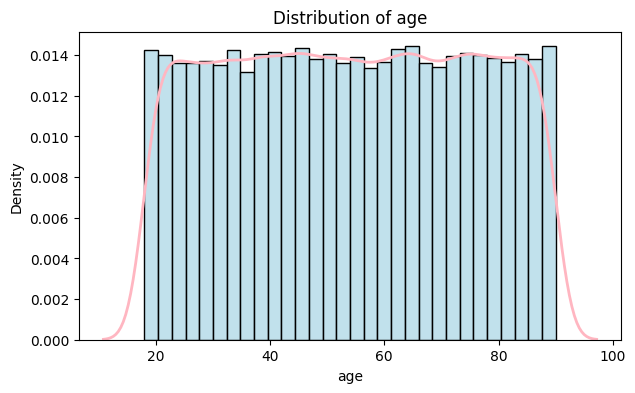

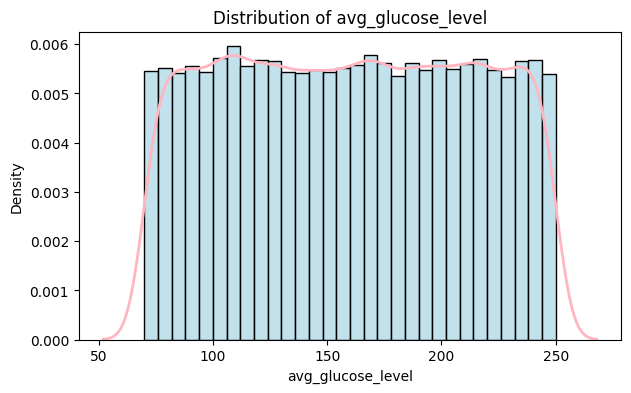

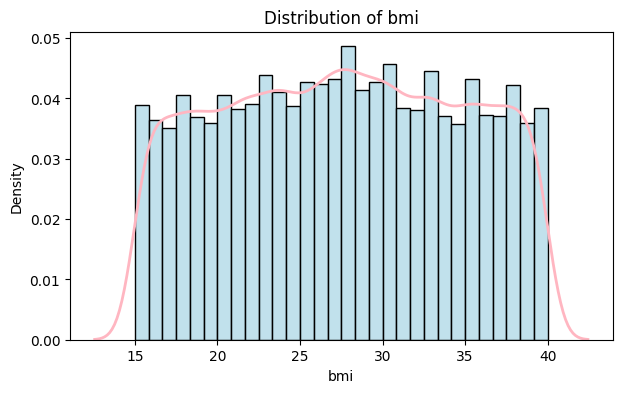

In [ ]:
# NUMERICAL FEATURES

numeric_cols = ["age", "avg_glucose_level", "bmi"]
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=30, color="#ADD8E6", stat="density")
    sns.kdeplot(df[col], color="#FFB6C1", linewidth=2)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


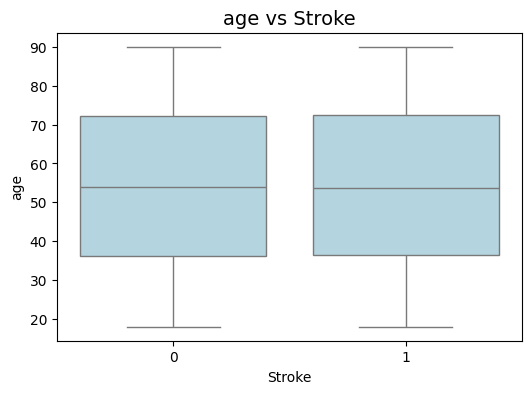

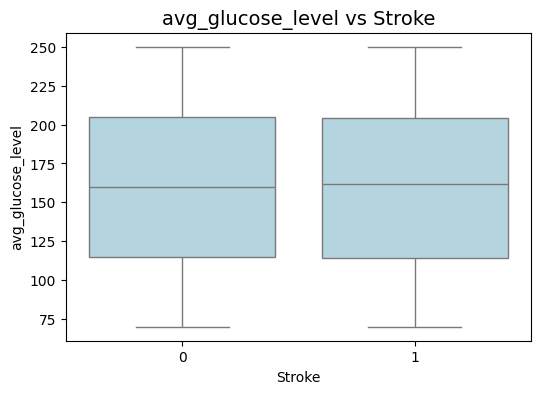

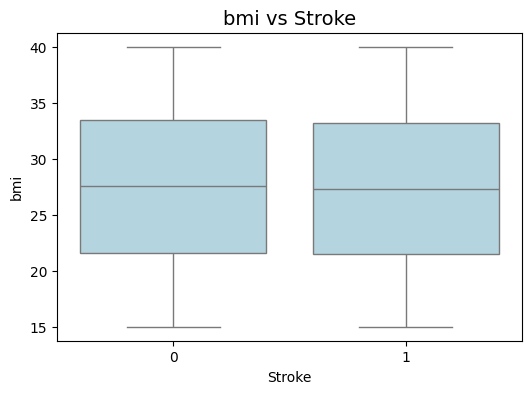

In [ ]:
#NUMERICAL vs TARGET
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df["stroke"], y=df[col])
    plt.title(f"{col} vs Stroke", fontsize=14)
    plt.xlabel("Stroke")
    plt.ylabel(col)
    plt.show()

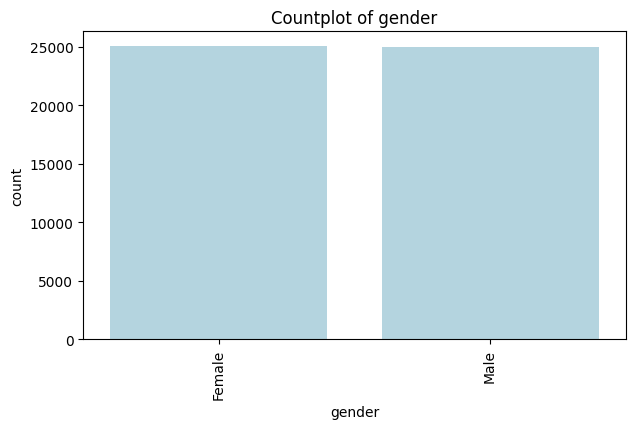

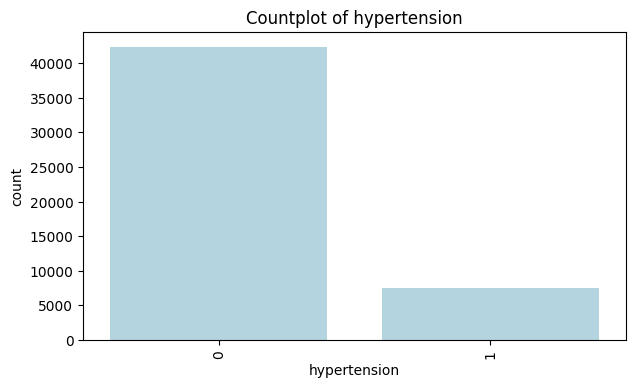

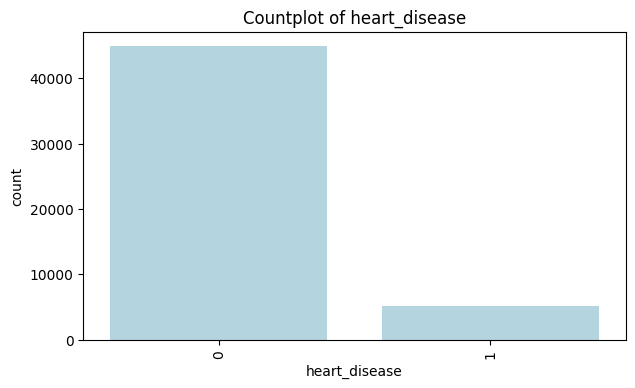

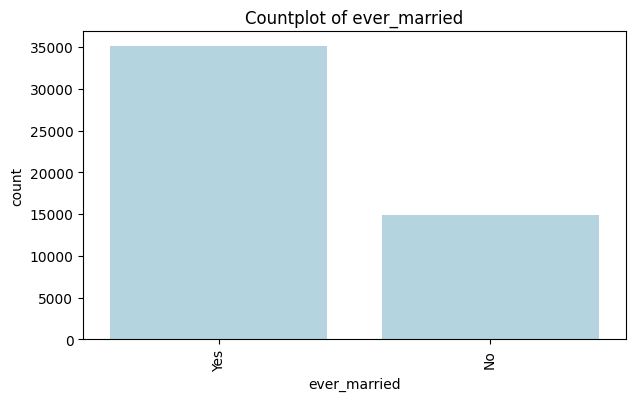

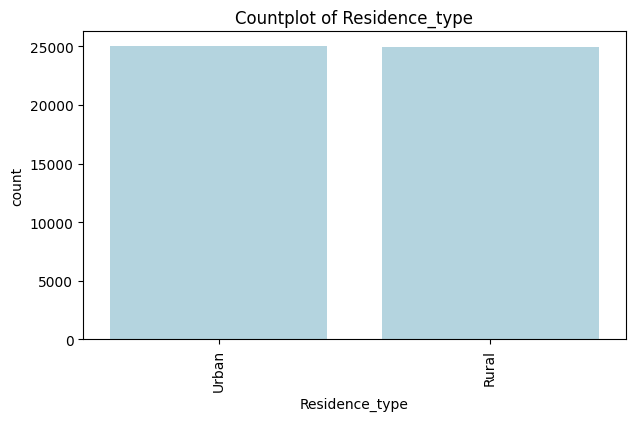

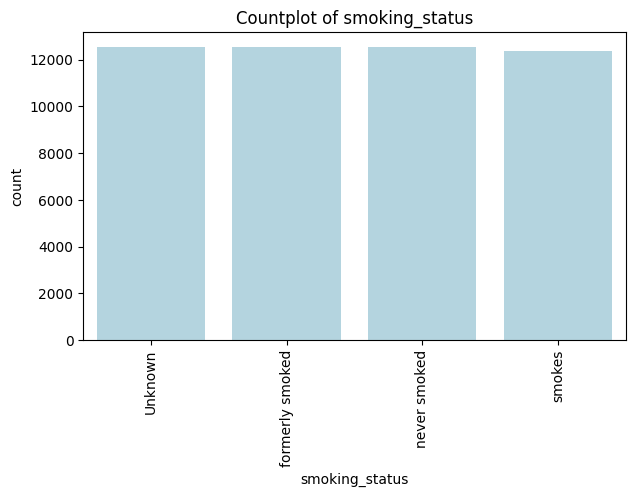

In [ ]:
# Categorical FEATURES
categorical_cols = ["gender", "hypertension", "heart_disease",
                    "ever_married", "Residence_type", "smoking_status"]
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=90)
    plt.show()

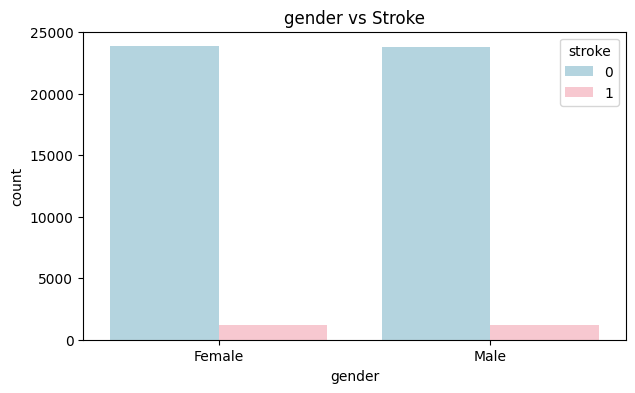

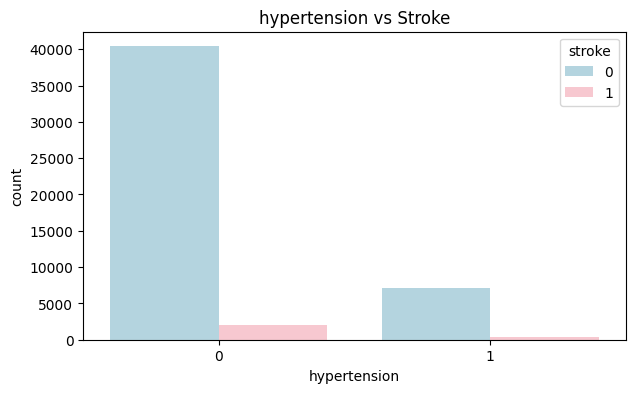

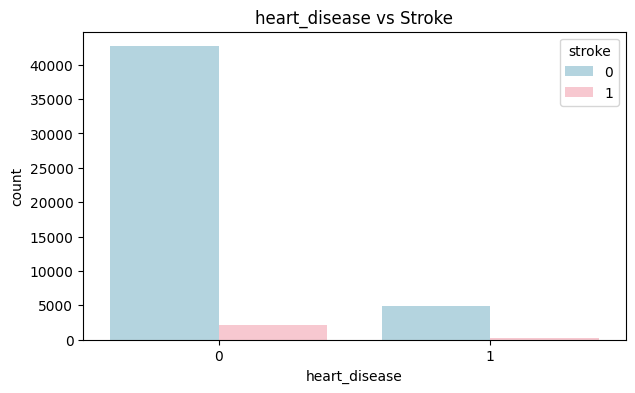

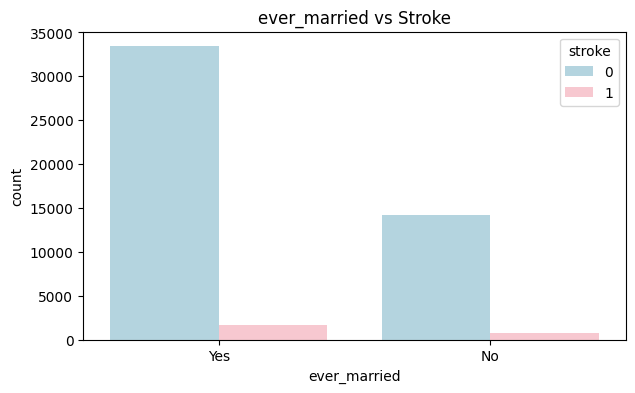

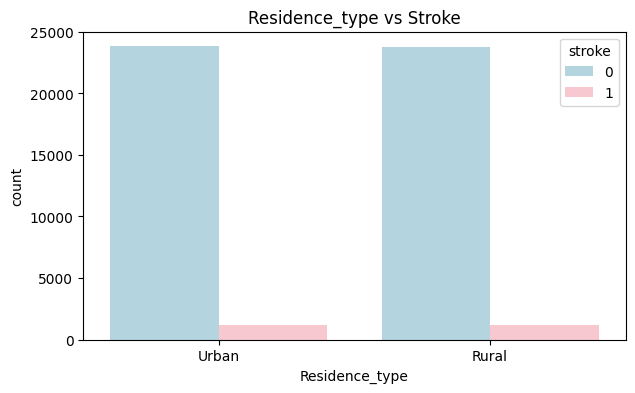

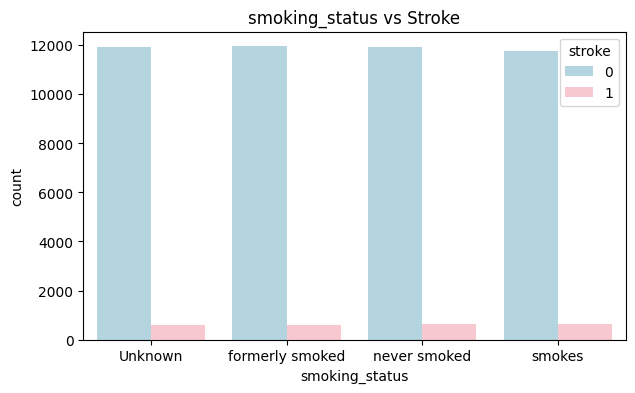

In [ ]:
#categorical VS  TARGET
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[col], hue=df["stroke"])
    plt.title(f"{col} vs Stroke")
    plt.xticks(rotation=0)
    plt.show()

**Outliers**

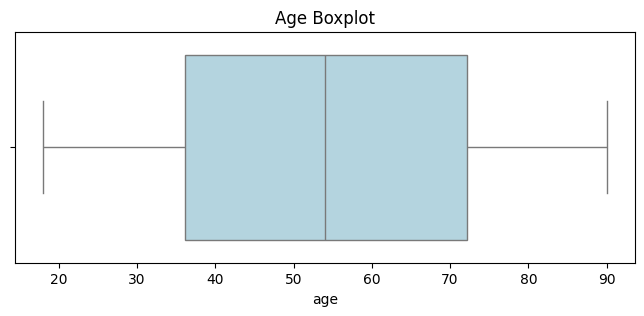

In [ ]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['age'])
plt.title("Age Boxplot")
plt.show()

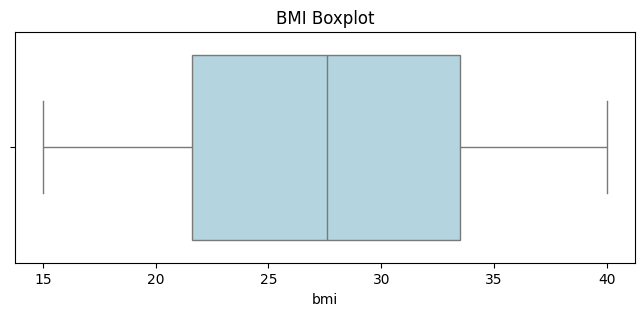

In [ ]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['bmi'])
plt.title("BMI Boxplot")
plt.show()

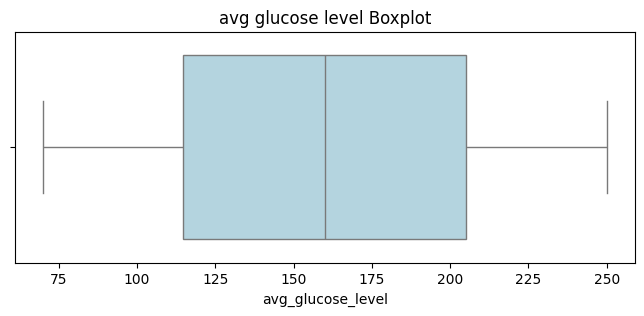

In [ ]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['avg_glucose_level'])
plt.title("avg glucose level Boxplot")
plt.show()

**staticts tests**

In [ ]:
# chi test (categorical VS categorical)
categorical_cols = ["gender", "hypertension", "heart_disease",
                    "ever_married", "Residence_type", "work_type", "smoking_status"]

for col in categorical_cols:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df[col], df['stroke']))
    print(f"Chi2 test for {col} vs stroke: Chi2={chi2:.2f}, p-value={p:.4f}")

Chi2 test for gender vs stroke: Chi2=0.01, p-value=0.9026
Chi2 test for hypertension vs stroke: Chi2=0.14, p-value=0.7062
Chi2 test for heart_disease vs stroke: Chi2=0.50, p-value=0.4782
Chi2 test for ever_married vs stroke: Chi2=0.61, p-value=0.4351
Chi2 test for Residence_type vs stroke: Chi2=0.16, p-value=0.6909
Chi2 test for work_type vs stroke: Chi2=5.25, p-value=0.1544
Chi2 test for smoking_status vs stroke: Chi2=3.52, p-value=0.3183


In [ ]:
#T test (numeric and Target)
numeric_cols = ["age", "bmi", "avg_glucose_level"]

for col in numeric_cols:
    group0 = df[df['stroke']==0][col]
    group1 = df[df['stroke']==1][col]

    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)
    print(f"T-test for {col} vs stroke: t-stat={t_stat:.4f}, p-value={p_val:.4f}")

T-test for age vs stroke: t-stat=-0.3953, p-value=0.6927
T-test for bmi vs stroke: t-stat=1.1636, p-value=0.2447
T-test for avg_glucose_level vs stroke: t-stat=0.2088, p-value=0.8346


In [ ]:
#ANOVA (numeric vs categorical "Multi-Class Categorical")
categorical_cols_multi = [ "work_type", "smoking_status"]
for cat_col in categorical_cols_multi:
    for num_col in numeric_cols:

        groups = [df[df[cat_col] == val][num_col] for val in df[cat_col].unique()]
        f_stat, p_val = f_oneway(*groups)
        print(f"ANOVA for {num_col} by {cat_col}: F-stat={f_stat:.4f}, p-value={p_val:.4f}")

ANOVA for age by work_type: F-stat=0.9522, p-value=0.4143
ANOVA for bmi by work_type: F-stat=3.2914, p-value=0.0197
ANOVA for avg_glucose_level by work_type: F-stat=2.0303, p-value=0.1073
ANOVA for age by smoking_status: F-stat=0.9788, p-value=0.4015
ANOVA for bmi by smoking_status: F-stat=0.5151, p-value=0.6718
ANOVA for avg_glucose_level by smoking_status: F-stat=3.4323, p-value=0.0162


**Encoding**

In [ ]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [ ]:
#Lable Encoding
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [ ]:
#One Hot Encoding (multi_classes)
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

In [ ]:
df.dtypes

,0
gender,int64
age,float64
hypertension,int64
heart_disease,int64
ever_married,int64
Residence_type,int64
avg_glucose_level,float64
bmi,float64
stroke,int64
work_type_Govt_job,bool


**scaling**

In [ ]:
continuous_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])
df[continuous_cols].describe()

,age,avg_glucose_level,bmi
count,5.000000e+04,5.000000e+04,5.000000e+04
mean,2.403056e-16,-3.731060e-16,4.463985e-17
std,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.731020e+00,-1.733563e+00,-1.774091e+00
25%,-8.612095e-01,-8.720273e-01,-8.401730e-01
50%,-1.010230e-03,2.612979e-03,8.843378e-03
75%,8.688002e-01,8.685811e-01,8.437095e-01
max,1.728999e+00,1.735127e+00,1.763477e+00


#**Visuals**

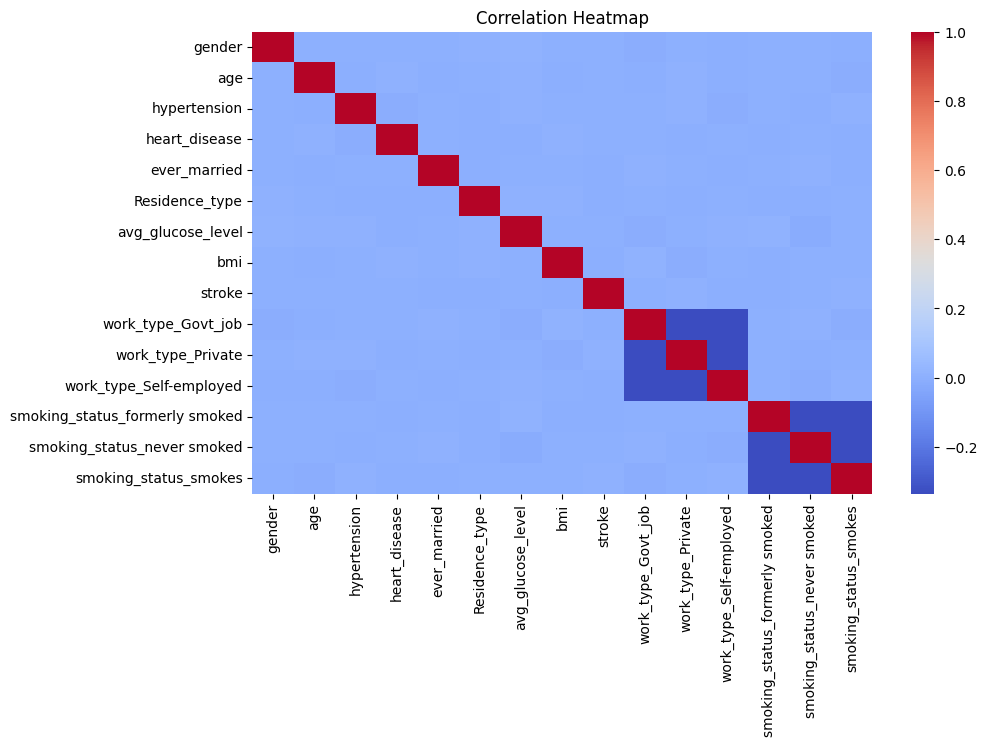

In [ ]:
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

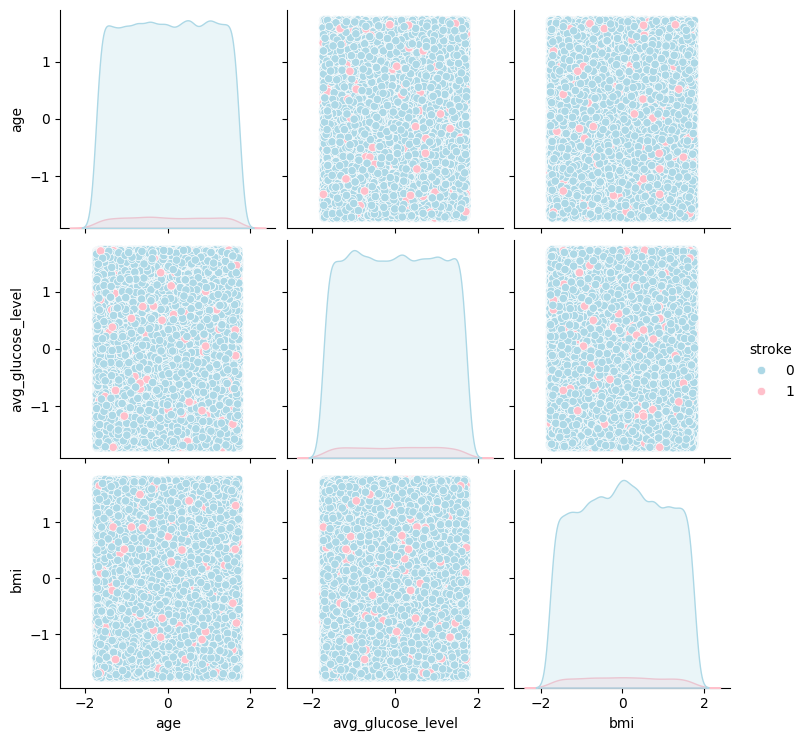

In [ ]:
sns.pairplot(df[["age", "avg_glucose_level", "bmi", "stroke"]], hue="stroke", palette=custom_colors)
plt.show()

In [ ]:
#Basic Statistical Analysis
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

#  Descriptive Statistics
print("=== Descriptive Statistics ===")
desc_stats = df[numeric_cols].agg(['min', 'max', 'mean', 'var', 'std'])
print(desc_stats)

# Skewness & Kurtosis
print("\n=== Skewness ===")
skewness = df[numeric_cols].skew()
print(skewness)

print("\n=== Kurtosis ===")
kurtosis = df[numeric_cols].kurtosis()
print(kurtosis)

# Covariance Matrix
print("\n=== Covariance Matrix ===")
cov_matrix = df[numeric_cols].cov()
print(cov_matrix)

# Correlation Matrix
print("\n=== Correlation Matrix ===")
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)


=== Descriptive Statistics ===
               age  avg_glucose_level           bmi
min  -1.731020e+00      -1.733563e+00 -1.774091e+00
max   1.728999e+00       1.735127e+00  1.763477e+00
mean  2.403056e-16      -3.731060e-16  4.463985e-17
var   1.000020e+00       1.000020e+00  1.000020e+00
std   1.000010e+00       1.000010e+00  1.000010e+00

=== Skewness ===
age                 -0.003672
avg_glucose_level    0.003497
bmi                 -0.008962
dtype: float64

=== Kurtosis ===
age                 -1.198867
avg_glucose_level   -1.201680
bmi                 -1.139259
dtype: float64

=== Covariance Matrix ===
                        age  avg_glucose_level       bmi
age                1.000020           0.005088 -0.005461
avg_glucose_level  0.005088           1.000020  0.002543
bmi               -0.005461           0.002543  1.000020

=== Correlation Matrix ===
                        age  avg_glucose_level       bmi
age                1.000000           0.005088 -0.005461
avg_glucose_le

In [ ]:
pca = PCA(n_components=0.89, random_state=42)
X_pca = pca.fit_transform(X_norm)

print(f"Original features: {X_norm.shape[1]}")
print(f"PCA components: {X_pca.shape[1]}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")

Original features: 14
PCA components: 12
Explained variance ratio: 0.9524


In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke'].values

scaler = StandardScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(f"Features normalized using StandardScaler")
print(f"X shape: {X_norm.shape}")
print(f"y shape: {y.shape}")
print(f"\nClass distribution:")
print(f"  Class 0: {np.sum(y == 0)}")
print(f"  Class 1: {np.sum(y == 1)}")

Features normalized using StandardScaler
X shape: (50000, 14)
y shape: (50000,)

Class distribution:
  Class 0: 47573
  Class 1: 2427


In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

print(f"Number of clusters: {k}")
print(f"\nCluster distribution:")
for i in range(k):
    print(f"  Cluster {i}: {np.sum(clusters == i)} samples")

Number of clusters: 4

Cluster distribution:
  Cluster 0: 5133 samples
  Cluster 1: 14144 samples
  Cluster 2: 11140 samples
  Cluster 3: 19583 samples


In [ ]:
minority_idx = np.where(y == 1)[0]
majority_idx = np.where(y == 0)[0]

ks = 5
selected_majority_idx = []

for cluster_id in range(k):
    cluster_mask = (clusters == cluster_id)
    cl_min_idx = minority_idx[cluster_mask[minority_idx]]
    cl_maj_idx = majority_idx[cluster_mask[majority_idx]]

    if len(cl_min_idx) == 0 or len(cl_maj_idx) == 0:
        continue

    minority_center = X_pca[cl_min_idx].mean(axis=0)
    distances = np.linalg.norm(X_pca[cl_maj_idx] - minority_center, axis=1)

    n_select = min(ks * len(cl_min_idx), len(cl_maj_idx))
    nearest = cl_maj_idx[np.argsort(distances)[:n_select]]
    selected_majority_idx.extend(nearest.tolist())

balanced_idx = np.concatenate([minority_idx, np.array(selected_majority_idx)])
X_bal = X_norm.iloc[balanced_idx].reset_index(drop=True)
y_bal = y[balanced_idx]

print(f"Original dataset:")
print(f"  Minority class: {len(minority_idx)}")
print(f"  Majority class: {len(majority_idx)}")
print(f"\nBalanced dataset:")
print(f"  Minority class: {np.sum(y_bal == 1)}")
print(f"  Majority class: {np.sum(y_bal == 0)}")
print(f"  Total samples: {len(y_bal)}")

Original dataset:
  Minority class: 2427
  Majority class: 47573

Balanced dataset:
  Minority class: 2427
  Majority class: 12135
  Total samples: 14562


In [ ]:
from sklearn.model_selection import train_test_split

# Split the balanced dataset into training and testing sets
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_bal, y_train_bal)
X_test_lda = lda.transform(X_test_bal)

print("LDA Results")
print(f"Explained Variance Ratio: {lda.explained_variance_ratio_}")
print(f"Shape after LDA (Train): {X_train_lda.shape}")
print(f"Shape after LDA (Test): {X_test_lda.shape}")

LDA Results
Explained Variance Ratio: [1.]
Shape after LDA (Train): (11649, 1)
Shape after LDA (Test): (2913, 1)


In [ ]:
pca = PCA(n_components=0.89, random_state=42)
X_train_pca = pca.fit_transform(X_train_bal)
X_test_pca = pca.transform(X_test_bal)

In [ ]:
svd = TruncatedSVD(n_components=5, random_state=42)
X_train_svd = svd.fit_transform(X_train_bal)
X_test_svd = svd.transform(X_test_bal)

print("SVD Results")
print(f"Explained Variance Ratio per component: {svd.explained_variance_ratio_}")
print(f"Total Variance Explained: {svd.explained_variance_ratio_.sum():.4f}")
print(f"Shape after SVD: {X_train_svd.shape}")

SVD Results
Explained Variance Ratio per component: [0.13625947 0.1193233  0.09667284 0.09111372 0.08832245]
Total Variance Explained: 0.5317
Shape after SVD: (11649, 5)


##**Machine Learning**

In [ ]:
classification_models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree (Entropy)": DecisionTreeClassifier(criterion="entropy", max_depth=5),
    "KNN Euclidean": KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    "KNN Manhattan": KNeighborsClassifier(n_neighbors=5, metric='manhattan'),
    "KNN Minkowski": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "LDA Classifier": LDA(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=2000),
    "Linear SVM": LinearSVC(max_iter=5000)
}


In [ ]:
data_versions = {
    "Balanced (Original Features)": (X_train_bal, X_test_bal),
    "LDA Version": (X_train_lda, X_test_lda),
    "PCA Version": (X_train_pca, X_test_pca),
    "SVD Version": (X_train_svd, X_test_svd)
}

In [ ]:
results_list = []

for version_name, (train_data, test_data) in data_versions.items():
    for model_name, model in classification_models.items():
        model.fit(train_data, y_train_bal)
        y_pred = model.predict(test_data)


        acc = accuracy_score(y_test_bal, y_pred)
        f1 = f1_score(y_test_bal, y_pred, average='weighted')
        prec = precision_score(y_test_bal, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test_bal, y_pred, average='weighted')

        results_list.append({
            "Data Version": version_name,
            "Model": model_name,
            "Accuracy": acc,
            "F1-Score": f1,
            "Precision": prec,
            "Recall": rec
        })


comparison_df = pd.DataFrame(results_list)
display(comparison_df.sort_values(by="Accuracy", ascending=False))

,Data Version,Model,Accuracy,F1-Score,Precision,Recall
7,Balanced (Original Features),Neural Network,0.944044,0.940006,0.945530,0.944044
25,PCA Version,Neural Network,0.928939,0.921269,0.932969,0.928939
4,Balanced (Original Features),KNN Minkowski,0.897700,0.880481,0.901857,0.897700
2,Balanced (Original Features),KNN Euclidean,0.893581,0.874492,0.897952,0.893581
3,Balanced (Original Features),KNN Manhattan,0.893237,0.872756,0.900815,0.893237
1,Balanced (Original Features),Decision Tree (Entropy),0.892551,0.876254,0.890488,0.892551
5,Balanced (Original Features),Logistic Regression,0.886028,0.867049,0.883004,0.886028
10,LDA Version,Decision Tree (Entropy),0.885685,0.863530,0.888198,0.885685
16,LDA Version,Neural Network,0.885685,0.867758,0.880923,0.885685
14,LDA Version,Logistic Regression,0.885685,0.865073,0.885088,0.885685


In [ ]:
results_list = []

for version_name, (train_data, test_data) in data_versions.items():
    for model_name, model in classification_models.items():

        model.fit(train_data, y_train_bal)

        y_train_pred = model.predict(train_data)
        y_test_pred = model.predict(test_data)

        train_acc = accuracy_score(y_train_bal, y_train_pred)
        test_acc = accuracy_score(y_test_bal, y_test_pred)

        test_f1 = f1_score(y_test_bal, y_test_pred, average='weighted')
        test_prec = precision_score(y_test_bal, y_test_pred, average='weighted', zero_division=0)
        test_rec = recall_score(y_test_bal, y_test_pred, average='weighted')

        gap = train_acc - test_acc

        # check fit logic
        if gap > 0.05:
           fit_status = "Overfitting"
        elif test_acc < 0.84:
           fit_status = "Underfitting"
        else:
           fit_status = "Good Fit"

        results_list.append({
            "Data Version": version_name,
            "Model": model_name,
            "Train Accuracy": round(train_acc, 3),
            "Test Accuracy": round(test_acc, 3),
            "Accuracy Gap": round(gap, 3),
            "F1-Score": round(test_f1, 3),
            "Precision": round(test_prec, 3),
            "Recall": round(test_rec, 3),
            "Fit Status": fit_status
        })

comparison_df = pd.DataFrame(results_list)
display(comparison_df.sort_values(by="Test Accuracy", ascending=False))


,Data Version,Model,Train Accuracy,Test Accuracy,Accuracy Gap,F1-Score,Precision,Recall,Fit Status
7,Balanced (Original Features),Neural Network,0.947,0.944,0.002,0.940,0.947,0.944,Good Fit
25,PCA Version,Neural Network,0.934,0.930,0.005,0.923,0.932,0.930,Good Fit
4,Balanced (Original Features),KNN Minkowski,0.909,0.898,0.012,0.880,0.902,0.898,Good Fit
2,Balanced (Original Features),KNN Euclidean,0.908,0.894,0.015,0.874,0.898,0.894,Good Fit
1,Balanced (Original Features),Decision Tree (Entropy),0.894,0.893,0.001,0.876,0.890,0.893,Good Fit
3,Balanced (Original Features),KNN Manhattan,0.905,0.893,0.012,0.873,0.901,0.893,Good Fit
10,LDA Version,Decision Tree (Entropy),0.882,0.886,-0.004,0.864,0.888,0.886,Good Fit
5,Balanced (Original Features),Logistic Regression,0.878,0.886,-0.008,0.867,0.883,0.886,Good Fit
16,LDA Version,Neural Network,0.877,0.886,-0.009,0.868,0.881,0.886,Good Fit
14,LDA Version,Logistic Regression,0.879,0.886,-0.007,0.865,0.885,0.886,Good Fit


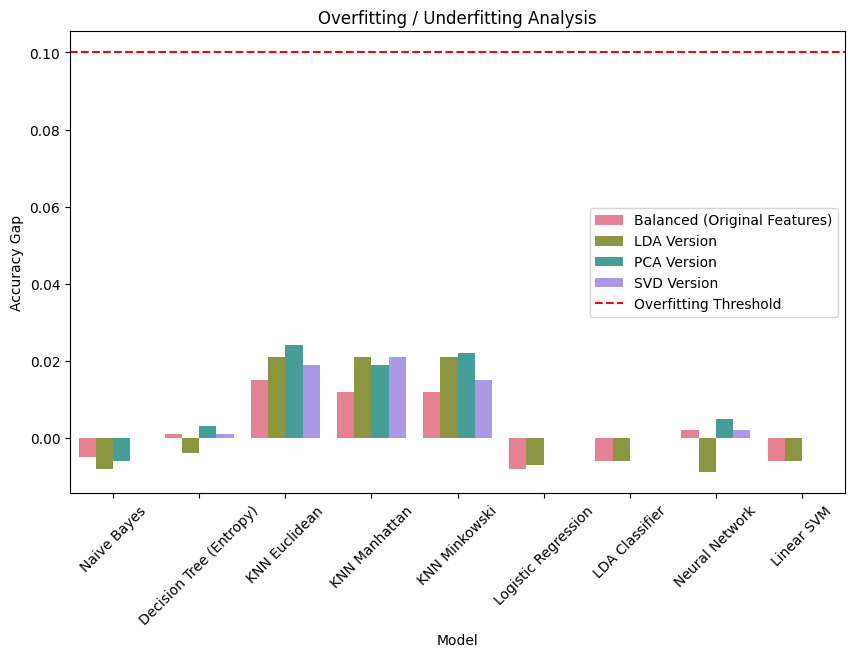

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=comparison_df,
    x="Model",
    y="Accuracy Gap",
    hue="Data Version"
)
plt.axhline(0.1, color='red', linestyle='--', label='Overfitting Threshold')
plt.xticks(rotation=45)
plt.title("Overfitting / Underfitting Analysis")
plt.legend()
plt.show()


In [ ]:
# Features and Target for regression
X_reg = df.drop(columns=['bmi', 'stroke'])
y_reg = df['bmi']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = lin_reg.predict(X_test_reg)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

In [ ]:
def willmott_index(y_true, y_pred):
    numerator = np.sum((y_pred - y_true) ** 2)
    denominator = np.sum((np.abs(y_pred - np.mean(y_true)) +
                          np.abs(y_true - np.mean(y_true))) ** 2)
    return 1 - (numerator / denominator)

willmott_d = willmott_index(y_test_reg.values, y_pred_reg)

In [ ]:
def nash_sutcliffe_efficiency(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) /
                np.sum((y_true - np.mean(y_true)) ** 2))

nse = nash_sutcliffe_efficiency(y_test_reg.values, y_pred_reg)


In [ ]:
def legates_mccabe_index(y_true, y_pred):
    mae = np.mean(np.abs(y_pred - y_true))
    return 1 - (mae / np.mean(np.abs(y_true - np.mean(y_true))))

lm_index = legates_mccabe_index(y_test_reg.values, y_pred_reg)


In [ ]:
print("Regression Model Evaluation")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Willmott’s Index (d): {willmott_d:.4f}")
print(f"Nash–Sutcliffe Efficiency (NSE): {nse:.4f}")
print(f"Legates–McCabe Index (L): {lm_index:.4f}")

Regression Model Evaluation
MAE: 0.8587
RMSE: 0.9995
R² Score: -0.0001
Willmott’s Index (d): 0.0234
Nash–Sutcliffe Efficiency (NSE): -0.0001
Legates–McCabe Index (L): 0.0001


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

cv_results = []

for model_name, model in classification_models.items():

    fold_accuracies = []

    for train_idx, test_idx in skf.split(X_bal, y_bal):

        X_train_fold = X_bal.iloc[train_idx]
        X_test_fold = X_bal.iloc[test_idx]
        y_train_fold = y_bal[train_idx]
        y_test_fold = y_bal[test_idx]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)

        acc = accuracy_score(y_test_fold, y_pred)
        fold_accuracies.append(acc)

    cv_results.append({
        "Model": model_name,
        "Average Accuracy": np.mean(fold_accuracies)
    })

cv_df = pd.DataFrame(cv_results)
display(cv_df.sort_values(by="Average Accuracy", ascending=False))


,Model,Average Accuracy
7,Neural Network,0.940256
4,KNN Minkowski,0.893902
2,KNN Euclidean,0.891361
3,KNN Manhattan,0.887104
1,Decision Tree (Entropy),0.886005
5,Logistic Regression,0.879069
6,LDA Classifier,0.876734
0,Naive Bayes,0.858261
8,Linear SVM,0.858261


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc(model, X_test, y_test, title):
    # Get prediction scores
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_bal),
    y=y_train_bal
)
class_weights_dict = dict(enumerate(class_weights))

print(f"Class weights for balanced training: {class_weights_dict}")

# Define a new Keras model for weighted training (similar to the previous one)
model_tf_weighted = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_tf_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_tf_weighted.summary()

Class weights for balanced training: {0: np.float64(0.6000309055320903), 1: np.float64(2.9992276004119462)}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with class weights
history_weighted = model_tf_weighted.fit(
    X_train_bal,
    y_train_bal,
    epochs=40,  # Number of training epochs
    batch_size=32,
    validation_split=0.15,
    class_weight=class_weights_dict, # Apply class weights here
    verbose=1
)

print("Weighted TensorFlow model training completed.")

Epoch 1/40
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6974 - loss: 0.5745 - val_accuracy: 0.7592 - val_loss: 0.5023
Epoch 2/40
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8329 - loss: 0.4520 - val_accuracy: 0.8970 - val_loss: 0.3229
Epoch 3/40
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8853 - loss: 0.3861 - val_accuracy: 0.8759 - val_loss: 0.3818
Epoch 4/40
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9022 - loss: 0.3534 - val_accuracy: 0.9056 - val_loss: 0.3343
Epoch 5/40
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9159 - loss: 0.3466 - val_accuracy: 0.8684 - val_loss: 0.3827
Epoch 6/40
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9157 - loss: 0.3497 - val_accuracy: 0.9193 - val_loss: 0.3116
Epoch 7/40
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9249 - loss: 0.3205 - val_accuracy: 0.8970 - val_loss: 0.3179
Epoch 8/40
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9224 - loss: 0.3285 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curves(data_versions, models, y_train, y_test):

    for version_name, (X_train, X_test) in data_versions.items():
        plt.figure(figsize=(8, 6))

        for model_name, model in models.items():
            # Train model
            model.fit(X_train, y_train)

            # Get prediction scores
            if hasattr(model, "predict_proba"):
                y_scores = model.predict_proba(X_test)[:, 1]
            elif hasattr(model, "decision_function"):
                y_scores = model.decision_function(X_test)
            else:
                continue  # skip models that don't support ROC

            # ROC calculation
            fpr, tpr, _ = roc_curve(y_test, y_scores)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")

        # Random guess line
        plt.plot([0, 1], [0, 1], linestyle='--')

        plt.title(f"ROC Curve Comparison – {version_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()


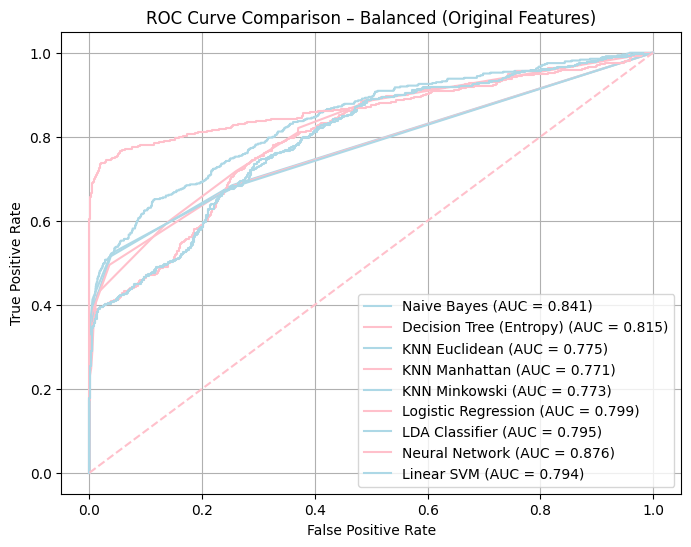

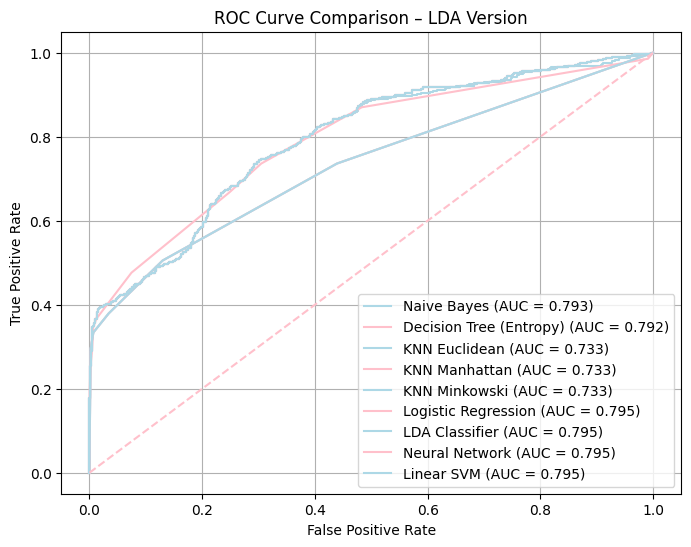

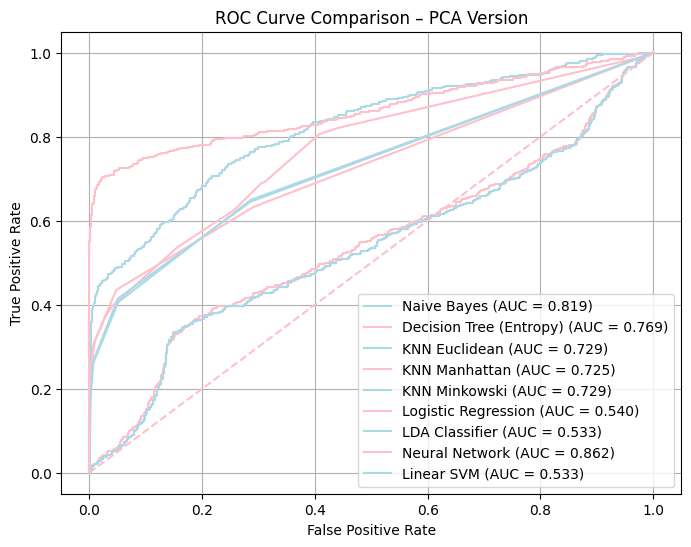

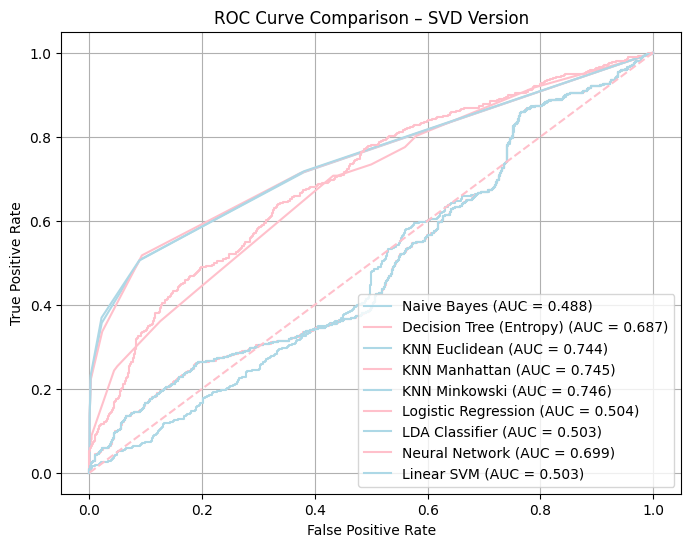

In [ ]:
plot_roc_curves(
    data_versions=data_versions,
    models=classification_models,
    y_train=y_train_bal,
    y_test=y_test_bal
)